In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


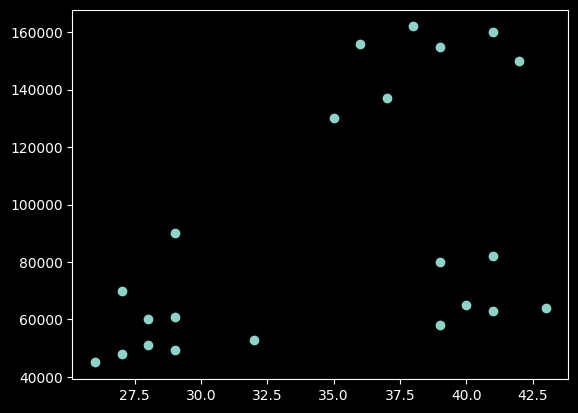

In [3]:
plt.scatter(df['Age'], df['Income($)'])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


/tmp/ipykernel_1951617/3237855437.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


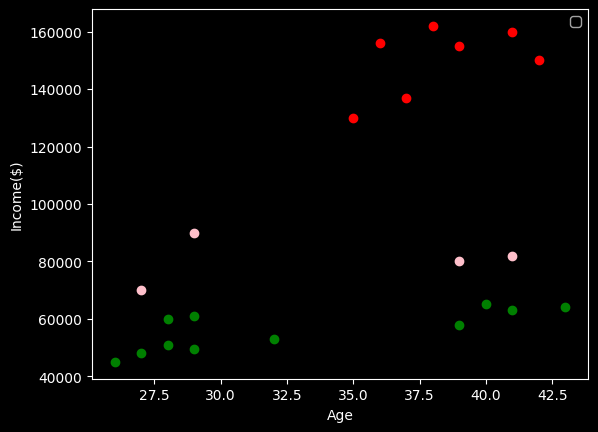

In [9]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color="green")
plt.scatter(df2.Age, df2['Income($)'], color="red")
plt.scatter(df3.Age, df3['Income($)'], color="pink")


plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [12]:
# We will use MinMaxScalter as the value for income and age is not standardized

scaler = MinMaxScaler()
scaler.fit(df[['Income($)', 'Age']])
df[['Income($)', 'Age']] = scaler.transform(df[['Income($)', 'Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [14]:
# We will again try to perform k means clustering on the scaled dataset
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [16]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [19]:
km.cluster_centers_


array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

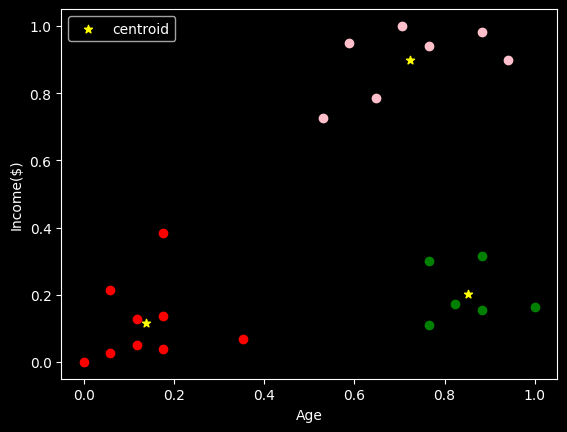

In [21]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color="green")
plt.scatter(df2.Age, df2['Income($)'], color="red")
plt.scatter(df3.Age, df3['Income($)'], color="pink")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="yellow", marker='*', label="centroid")

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

### Using Elbow Method to find the best suited number of cluster

In [25]:
k_range = range(1, 10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [26]:
sse

[5.434011511988176,
 2.3456144914725936,
 0.47507834985530945,
 0.34910470944195643,
 0.29844305402522653,
 0.2400451151098091,
 0.1817381175483089,
 0.14385754484422159,
 0.13492217186986952]

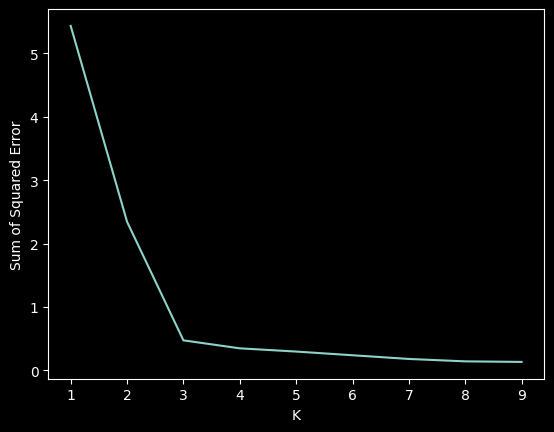

In [27]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range, sse)